In [1]:
def cost(y,ypred):
    N = len(y)
    cost = np.sum(np.square(y-ypred))/N
    return cost

In [2]:
import numpy as np
def get_weight_updates(w1,w0,x,y,learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    ypred = np.dot(x,w1.T)+w0
    diff = y-ypred
    w0_factors = np.ones((N,1))
    w1_update = -(2/N)*learning_rate*(np.dot(x.T,diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    return w1_update, w0_update

In [3]:
def gd_steps(x,y,iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,x,y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [4]:
np.random.seed(0)
x = 2*np.random.rand(100,1)
y = 6+4*x+np.random.randn(100,1)

In [5]:
w1, w0 = gd_steps(x,y,iters=1000)
print(w1,w0)

[[4.02181364]] [[6.16203122]]


In [7]:
ypred = w1[0,0]*x+w0
print(w1[0,0])
print(ypred)

4.021813642697164
[[10.5764825 ]
 [11.91474793]
 [11.01043516]
 [10.54486846]
 [ 9.56975253]
 [11.35736274]
 [ 9.68181966]
 [13.33512087]
 [13.9133753 ]
 [ 9.24629189]
 [12.53037234]
 [10.41626483]
 [10.73116996]
 [13.6071856 ]
 [ 6.7334188 ]
 [ 6.86286684]
 [ 6.32466048]
 [12.85931493]
 [12.4212341 ]
 [13.16008468]
 [14.03367242]
 [12.59016486]
 [ 9.87399921]
 [12.440317  ]
 [ 7.11338662]
 [11.30931741]
 [ 7.31511164]
 [13.7605959 ]
 [10.35958462]
 [ 9.49741732]
 [ 8.29001796]
 [12.38967845]
 [ 9.83113448]
 [10.73430205]
 [ 6.31316938]
 [11.13006096]
 [11.08550108]
 [11.12441836]
 [13.75318902]
 [11.64633959]
 [ 9.05377878]
 [ 9.67735337]
 [11.77351655]
 [ 6.64646247]
 [11.52525417]
 [11.55639229]
 [ 7.85427013]
 [ 7.19906631]
 [ 8.69921931]
 [ 9.08758511]
 [10.74848153]
 [ 9.68997833]
 [14.112142  ]
 [ 6.98284165]
 [ 7.842158  ]
 [ 7.45954486]
 [11.41539117]
 [ 8.19941447]
 [ 9.91286128]
 [ 8.12809959]
 [ 7.44072331]
 [ 7.04984772]
 [11.44130182]
 [ 7.27352338]
 [ 7.74326647]
 [ 9.12

In [8]:
cost(y,ypred)

0.9934784315632568

In [9]:
def mini_gd_steps(x,y,batch_size=10,iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    for ind in range(iters):
        np.random.seed(ind)
        random_index = np.random.permutation(x.shape[0])
        sample_x = x[random_index[0:batch_size]]
        sample_y = y[random_index[0:batch_size]]
        w1_update, w0_update = get_weight_updates(w1,w0,x,y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [11]:
w1,w0 = mini_gd_steps(x,y,iters=1000)
y_pred = w1[0,0]*+w0
print(w1[0,0],w0[0,0])
print(cost(y,ypred))

4.021813642697164 6.162031224717461
0.9934784315632568


In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

boston = load_boston()
df= pd.DataFrame(boston.data, columns = boston.feature_names)

df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


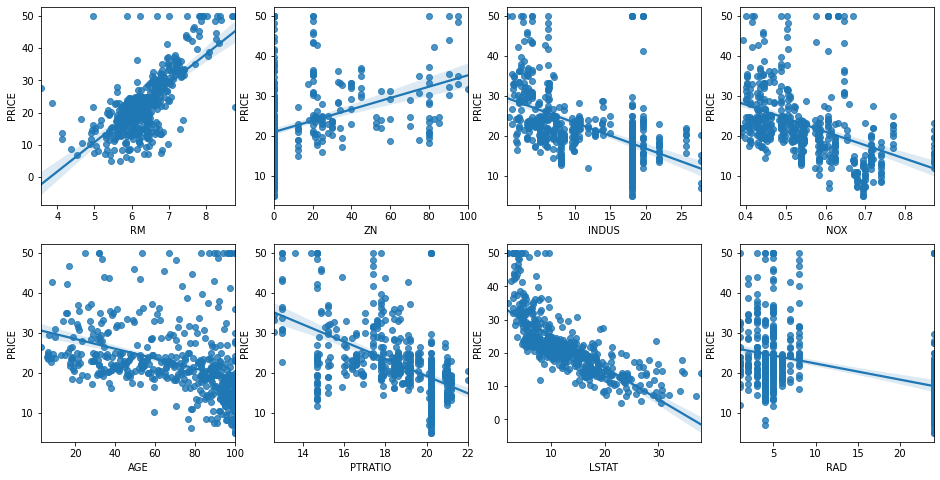

In [15]:
fig, axs = plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature,y='PRICE',data=df,ax=axs[row][col])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = df['PRICE']
x_data = df.drop(['PRICE'],axis=1,inplace=False)
x_train,x_test,y_train,y_test = train_test_split(x_data,y_target,test_size=0.3,random_state=156)


In [17]:
lr = LinearRegression()
lr.fit(x_train,y_train)
ypreds = lr.predict(x_test)
mse = mean_squared_error(y_test,ypreds)
rmse = np.sqrt(mse)

print(mse,rmse)
print(r2_score(y_test,ypreds))

17.29691590790215 4.158956107955715
0.7572263323138921


In [18]:
lr.intercept_

40.995595172164336

In [20]:
np.round(lr.coef_, 1)

array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
        -0. ,  -0.9,   0. ,  -0.6])

In [21]:
coeff = pd.Series(data=np.round(lr.coef_,1),index=x_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [22]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(lr,x_data,y_target,scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [23]:
np.round(neg_mse_scores,2)

array([-12.46, -26.05, -33.07, -80.76, -33.31])

In [24]:
np.round(rmse_scores,2)

array([3.53, 5.1 , 5.75, 8.99, 5.77])

In [25]:
avg_rmse

5.828658946215808

In [28]:
from sklearn.preprocessing import PolynomialFeatures

x = np.arange(4).reshape(2,2)
x

array([[0, 1],
       [2, 3]])

In [29]:
poly = PolynomialFeatures(degree=2)
poly.fit(x)
poly_ftr = poly.transform(x)
poly_ftr

array([[1., 0., 1., 0., 0., 1.],
       [1., 2., 3., 4., 6., 9.]])

In [33]:
def poly_func(x):
    y = 1 + 2*x[:,0]+3*x[:,0]**2+4*x[:,1]**3
    return y

In [35]:
x[:,0]

array([0, 2])

In [36]:
x[:,1]

array([1, 3])

In [34]:
y = poly_func(x)
print(y)

[  5 125]


In [37]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(x)
poly_ftr

array([[ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])

In [39]:
model = LinearRegression()
model.fit(poly_ftr,y)
print(np.round(model.coef_,2))
print(model.coef_.shape)

[0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
(10,)


In [40]:
#pipe line
from sklearn.pipeline import Pipeline

model = Pipeline([('poly',PolynomialFeatures(degree=3)),('linear',LinearRegression())])

model = model.fit(x,y)
print(np.round(model.named_steps['linear'].coef_,2))

[0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [41]:
#과적합예제

%matplotlib inline

def true_fun(x):
    return np.cos(1.5*np.pi*x)

np.random.seed(0)
n_samples = 30
x = np.sort(np.random.rand(n_samples))

y = true_fun(x)+np.random.rand(n_samples)*0.1


Degree 1 회귀계수는 [-1.52] 입니다.
Degree 1 MSE는 0.3855980524675215입니다.

Degree 4 회귀계수는 [  1.74 -22.98  31.58 -11.24] 입니다.
Degree 4 MSE는 0.005719308263122045입니다.

Degree 15 회귀계수는 [ 1.20140000e+02 -3.59872000e+03  5.21446800e+04 -4.14476860e+05
  1.80868799e+06 -3.37992441e+06 -6.02684726e+06  5.58440800e+07
 -1.69827424e+08  3.08630277e+08 -3.68966916e+08  2.93847846e+08
 -1.50696588e+08  4.51477248e+07 -6.01510532e+06] 입니다.
Degree 15 MSE는 42905665.41783635입니다.


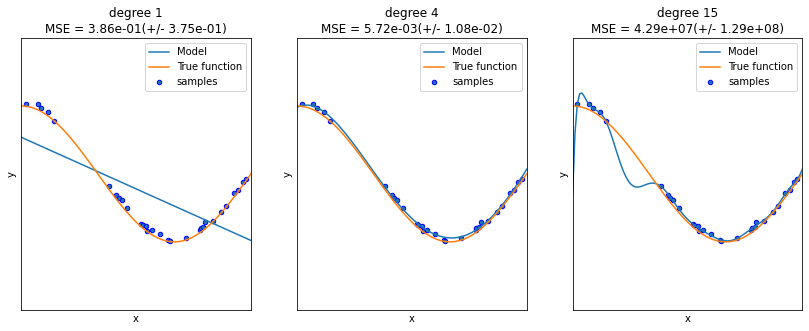

In [43]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

for i in range(len(degrees)):
    ax = plt.subplot(1,len(degrees),i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i],include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features",polynomial_features),("linear_regression",linear_regression)])
    pipeline.fit(x.reshape(-1,1),y)
    
    scores = cross_val_score(pipeline,x.reshape(-1,1),y,scoring="neg_mean_squared_error",cv=10)
    
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀계수는 {1} 입니다.'.format(degrees[i],np.round(coefficients,2)))
    print('Degree {0} MSE는 {1}입니다.'.format(degrees[i],-1*np.mean(scores)))
    
    x_test = np.linspace(0,1,100)
    #예측값 곡선
    plt.plot(x_test,pipeline.predict(x_test[:,np.newaxis]),label="Model")
    #실제 값 곡선
    plt.plot(x_test,true_fun(x_test),'-',label="True function")
    plt.scatter(x,y,edgecolor='b',s=20,label="samples")
    
    plt.xlabel("x");plt.ylabel("y");plt.xlim((0,1));plt.ylim((-2,2));plt.legend(loc="best")
    plt.title("degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i],-scores.mean(),scores.std()))
    
plt.show()